<a href="https://colab.research.google.com/github/feliperromao/datascience-na-pratica/blob/main/tratando_dados_tempo_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando dataset

In [104]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/feliperromao/datascience-na-pratica/main/tempo.csv", sep=";")

df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


## Renomeando as colunas

In [105]:
df.columns = ["aparencia", "temperatura", "umidade", "vento", "jogar"]

df.head()

,aparencia,temperatura,umidade,vento,jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


## Verificando valores nulos

In [106]:
df.isnull().sum()

aparencia      0
temperatura    0
umidade        1
vento          1
jogar          0
dtype: int64

### Preenchendo valores nulos em `umidade`

In [107]:
umidade_median = df.umidade.median()

df.umidade.fillna(umidade_median, inplace=True)

df.isnull().sum()

aparencia      0
temperatura    0
umidade        0
vento          1
jogar          0
dtype: int64

### Preenchendo valores nulos em `vento`

In [108]:
df.vento.value_counts()

FALSO         7
VERDADEIRO    6
Name: vento, dtype: int64

In [109]:
df.vento.fillna("FALSO", inplace=True)

df.isnull().sum()

aparencia      0
temperatura    0
umidade        0
vento          0
jogar          0
dtype: int64

## Corrigindo valores para `aparencia`

In [110]:
df.aparencia.value_counts()

chuva      5
sol        5
nublado    3
menos      1
Name: aparencia, dtype: int64

In [111]:
df.loc[df.aparencia == "menos"]

,aparencia,temperatura,umidade,vento,jogar
6,menos,64,65.0,VERDADEIRO,sim


In [112]:
df.loc[df.aparencia == "menos", "aparencia"] = "sol"

In [113]:
df.aparencia.value_counts()

sol        6
chuva      5
nublado    3
Name: aparencia, dtype: int64

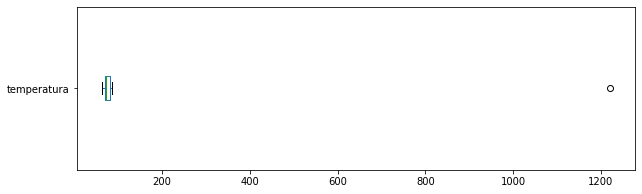

In [114]:
df.temperatura.plot.box(vert=False, figsize=(10,3));

In [115]:
df.temperatura.describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: temperatura, dtype: float64

In [116]:
df.loc[(df.temperatura < -130) | (df.temperatura > 130)]

,aparencia,temperatura,umidade,vento,jogar
7,sol,1220,95.0,FALSO,nao


In [117]:
df.temperatura.median()

73.5

In [118]:
temperatura_median = df.temperatura.median()

df.loc[(df.temperatura < -130) | (df.temperatura > 130), "temperatura"] = temperatura_median

In [119]:
df.temperatura.describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: temperatura, dtype: float64

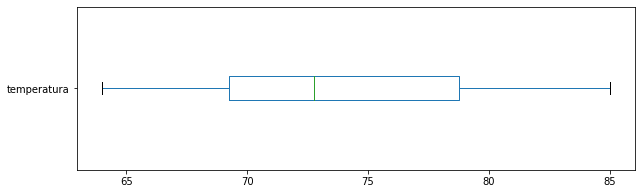

In [120]:
df.temperatura.plot.box(vert=False, figsize=(10,3));

## Corrigindo valores para `umidade`

In [121]:
df.umidade.describe()

count     14.000000
mean      89.428571
std       33.209624
min       65.000000
25%       71.250000
50%       85.000000
75%       90.000000
max      200.000000
Name: umidade, dtype: float64

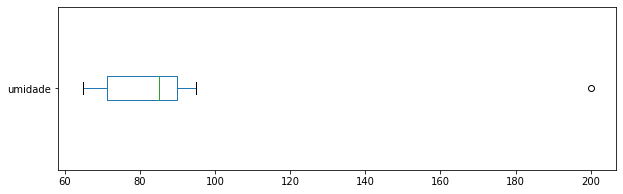

In [122]:
df.umidade.plot.box(vert=False, figsize=(10,3));

In [123]:
df.loc[(df.umidade < 0) | (df.umidade > 100)]

,aparencia,temperatura,umidade,vento,jogar
9,chuva,75.0,200.0,FALSO,sim


In [124]:
umidade_median = df.umidade.median()

df.loc[(df.umidade < 0) | (df.umidade > 100), "umidade"] = umidade_median

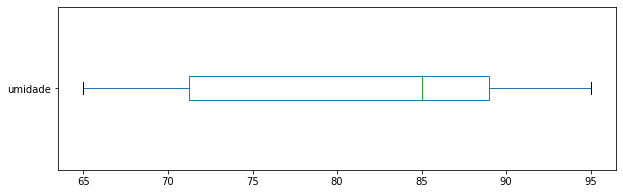

In [125]:
df.umidade.plot.box(vert=False, figsize=(10,3));